# **HW2: Linear Algebra and Probability Using NumPy**

#### **Attention:** *This assignment is to be completed individually. Group work is not permitted.*

### **TODO: Please Write Your Full name Here**: Ramsay Ward




In this assignment, you'll apply concepts from linear algebra and probability. Please import all necessary libraries and your dataset before beginning.

In [ ]:
# Import the libraries here.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

## **Linear Algebra Using the USA Housing Dataset**

**Load the Dataset: Read the dataset `USA_Housing.csv` into a pandas dataframe.**

In [6]:
# Write your code here
df = pd.read_csv('USA_Housing.csv')


#### **Question 1**
Create a matrix \( M \) consisting of the first 5 numerical columns of the dataset. Print its dimensions.

In [27]:
# Write your code here

M = df.select_dtypes(include=[np.number]).to_numpy()[:, :5]
M.shape


(5000, 5)

#### **Question 2**
Compute the rank of matrix \( M \).

In [9]:
rank = np.linalg.matrix_rank(M)
rank

5

#### **Question 3**
Extract the `Price` column as a vector \( p \). Compute the dot product of the matrix \( M \) (transposed) and vector \( p \). What does this represent (write 1-2 sentences)?

In [10]:
# Write your code here
p = df.Price.to_numpy()

np.dot(M.transpose(),p)


array([4.34532727e+14, 3.76138778e+10, 4.36433193e+10, 2.48991246e+10,
       2.29938746e+14])

#In the context of code, my code is multiplying the price of each house to each of there attributes.


**TODO: Write your answer here**

## **Probability**

#### **Question 4**
Suppose houses are classified as "High-Price" if their prices are above the 90th percentile of all house prices in the dataset. What is the probability that a randomly selected house from the dataset is "High-Price"?

Here's how you can solve this using NumPy:

* Calculate the 90th percentile price.
* Count the number of houses with prices above this value.
* Divide this count by the total number of houses to get the probability.

In [11]:
# Write your code here

percentile_90_price = np.percentile(df.Price, 90)


high_price_count = np.sum(df.Price > percentile_90_price)

# Compute the probability
probability_high_price =  high_price_count / len(df)

print(f"90th Percentile Price: ${percentile_90_price:.2f}")
print(f"Number of High-Price Houses: {high_price_count}")
print(f"Probability of a House Being High-Price: {probability_high_price:.4f}")


# The probability value of 0.1000 (or  10 %) indicates that there is a
# 10% chance that a randomly selected house from the dataset will be classified as "High-Price".

90th Percentile Price: $1684620.95
Number of High-Price Houses: 500
Probability of a House Being High-Price: 0.1000


#### **Question 5**
Compute the correlation between `Avg. Area Income` and `Price`. Also, write in 1-2 sentences below your code cell about what you infer from this correlation value.

PS: You can use `corr()` method here.

In [ ]:
# Write your code here
correlation_income_price = df['Avg. Area Income'].corr(df['Price'])
print(f"Correlation between 'Avg. Area Income' and 'Price': {correlation_income_price}")

Correlation between 'Avg. Area Income' and 'Price': 0.6397337782498941


**TODO: Write your interpretation of the correlation here**

#This is a strong positive correlation, meaning as the average area income goes up the price of houses also goes up, specifically by 0.63 per unit of increase in Avg. Area Income. This is not a strict causation but a strong correlation.

## **Visualization**

* All plots should have a title and appropriate labels.

#### **Question 6**
Generate a histogram for `Avg. Area House Age`. Describe its distribution in 1-2 sentences.

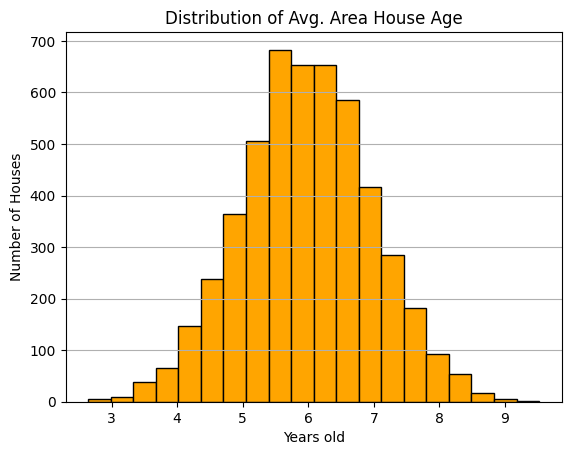

In [17]:
# Write your code here
plt.hist(df['Avg. Area House Age'], bins=20, color='ORANGE', edgecolor='black');
plt.xlabel('Years old')
plt.ylabel('Number of Houses')
plt.title('Distribution of Avg. Area House Age')
plt.grid(True,  axis = 'y')

#From this distribution I can see the there is a normal distribution of houses with the mean being about 6 years old. The tails get realativley thin, so I know that majority of house are between 5-7 years old.

Text(0.5, 1.0, 'Distribution of Avg. Area House Age')

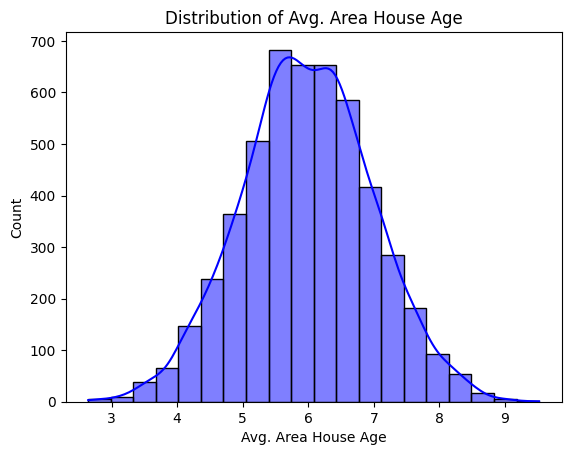

In [18]:
sns.histplot(data = df['Avg. Area House Age'] , kde = True , color = 'blue', bins = 20);
plt.xlabel = ('Avg. Area House Age')
plt.ylabel = ('Number of Houses')
plt.title('Distribution of Avg. Area House Age')

#I am also taking a class where we use seaborn so i wanted to graph the same thing but add a kde curve to further more show the normal distribution.

**TODO: Write your interpretation of the distribution here**

#### **Question 7**
Generate a scatter plot between `Avg. Area Income` and `Price`. What does the relationship look like (write 1-2 sentences)?

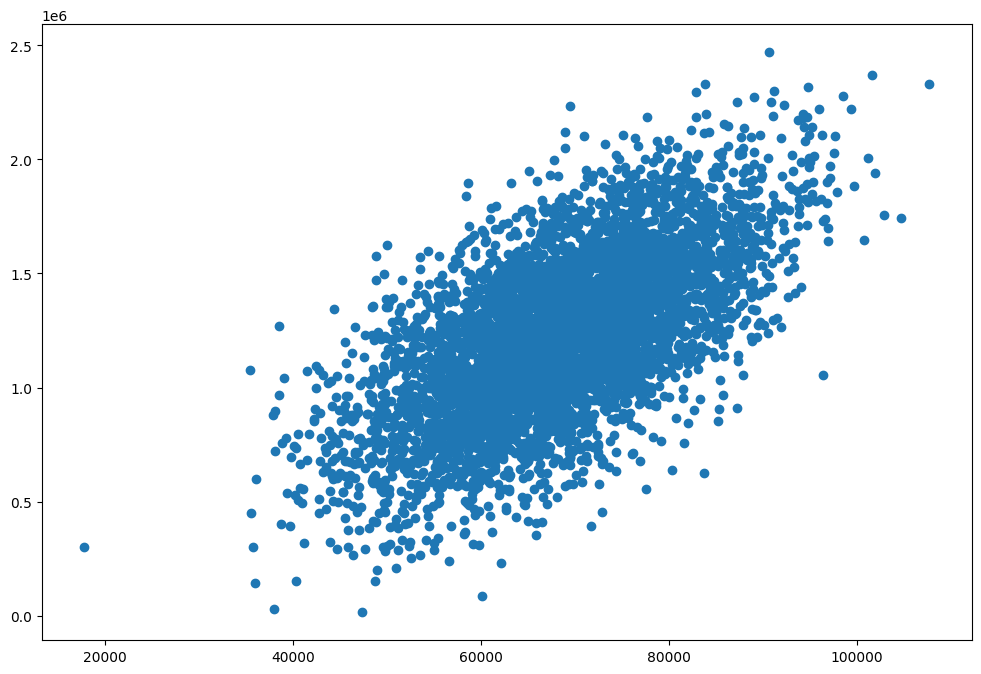

In [22]:
# Write your code here
plt.figure(figsize = (12,8))
plt.xlabel = ('Avg. Area Income')
plt.ylabel = ('Price')
plt.scatter(df['Avg. Area Income'], df['Price'])
plt.show()


#This scatter plot is showing that as average area income goes up the prices of houses also goes up. I can see this because it is a positive step slope going up to the right. I do notice that the middle is quite thick, meaning theres room for lots of variation, but the general trend is still positive.

**TODO: Write your answer here**

### **Question 8**

Plot a heatmap showing the correlation between the numerical columns in the dataset. Which two factors have the highest correlation with the 'Price'?

You can choose to use either `seaborn` or `matplotlib` here.

Price                  1.000000
Avg. Area Income       0.639734
Avg. Area House Age    0.452543
Name: Price, dtype: float64

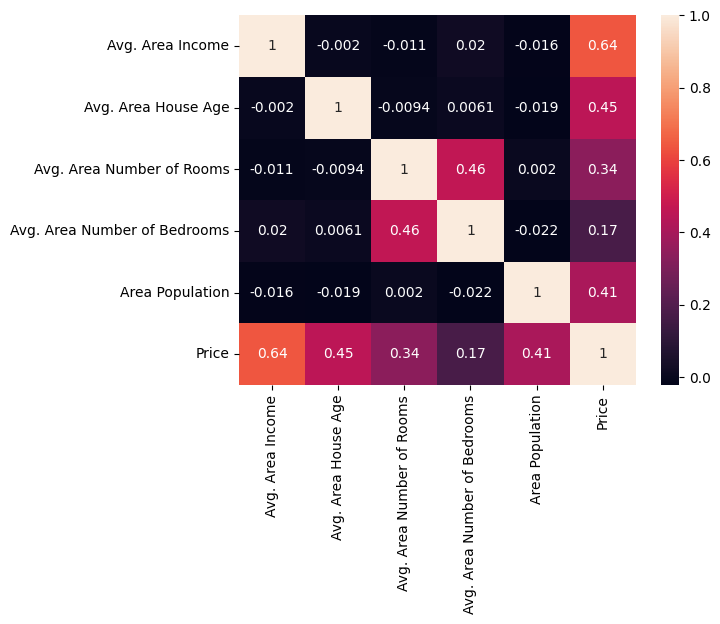

In [32]:
# Write your code here

correlation_matrix = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr()
sns.heatmap(correlation_matrix, cmap = 'rocket', annot=True, xticklabels=correlation_matrix, yticklabels=correlation_matrix)

correlation_matrix['Price'].sort_values(ascending = False).head(3)


#The variables with the highest correlation with price are, Area Income(.64) and area house age (.45).

**TODO: Write your answer here**